<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Защита-персональных-данных-клиентов" data-toc-modified-id="Защита-персональных-данных-клиентов-1">Защита персональных данных клиентов</a></span></li><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-2">Описание данных:</a></span></li><li><span><a href="#План-работы:" data-toc-modified-id="План-работы:-3">План работы:</a></span></li><li><span><a href="#1.-Загрузка-и-изучение-данных." data-toc-modified-id="1.-Загрузка-и-изучение-данных.-4">1. Загрузка и изучение данных.</a></span></li><li><span><a href="#2.-Проверка-изменения-качества-линейной-регрессии-при-умножении-признаков-на-обратимую-матрицу" data-toc-modified-id="2.-Проверка-изменения-качества-линейной-регрессии-при-умножении-признаков-на-обратимую-матрицу-5">2. Проверка изменения качества линейной регрессии при умножении признаков на обратимую матрицу</a></span></li><li><span><a href="#3.-Алгоритм-преобразования" data-toc-modified-id="3.-Алгоритм-преобразования-6">3. Алгоритм преобразования</a></span></li><li><span><a href="#4.-Проверка-алгоритма" data-toc-modified-id="4.-Проверка-алгоритма-7">4. Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#4.1.-Подготовка-для-преобразования-данных." data-toc-modified-id="4.1.-Подготовка-для-преобразования-данных.-7.1">4.1. Подготовка для преобразования данных.</a></span></li><li><span><a href="#4.2.-Проверка-модели-на-исходных-данных." data-toc-modified-id="4.2.-Проверка-модели-на-исходных-данных.-7.2">4.2. Проверка модели на исходных данных.</a></span></li><li><span><a href="#4.3.-Проверка-модели-на-преобразованных-и-обратнопреобразованных-данных,-сравнение-результатов." data-toc-modified-id="4.3.-Проверка-модели-на-преобразованных-и-обратнопреобразованных-данных,-сравнение-результатов.-7.3">4.3. Проверка модели на преобразованных и обратнопреобразованных данных, сравнение результатов.</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7.4">Чек-лист проверки</a></span></li></ul></li></ul></div>

# Защита персональных данных клиентов

Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы. Данные необходимо защитить так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

# Описание данных:

Набор данных находится в файле "/datasets/insurance.csv."

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

# План работы:

1. Загрузка и изучение данных
2. Проверка изменения качества линейной регрессии при умножении признаков на обратимую матрицу, обоснование решения.
3. Разработка алгоритма преобразования данных для решения задачи.
4. Программирование разработанного алгоритма с использованием матричных операций. Проверка различий в качестве линейной регрессии из sklearn до и после преобразования с помощью метрики R2.


# 1. Загрузка и изучение данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/datasets/insurance.csv")
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски в данных отсутствуют, однако всё же необходимо проверить датасет на дубликаты, и возможность оптимизировать типы данных в наших столбцах.

In [4]:
print('Количество пропусков -', df[df.isna() == True].sum().sum())
print('Количество нулевых значений -', df[df.isnull() == True].sum().sum())
print('Количество дубликатов -', df.duplicated().sum())
print('Количество строк с дробной частью не равной нулю по столбцу "Возраст" -', len(df[df['Возраст'] % 1 != 0]))
print('Количество строк с дробной частью не равной нулю по столбцу "Зарплата" -', len(df[df['Зарплата'] % 1 != 0]))

Количество пропусков - 0.0
Количество нулевых значений - 0.0
Количество дубликатов - 153
Количество строк с дробной частью не равной нулю по столбцу "Возраст" - 0
Количество строк с дробной частью не равной нулю по столбцу "Зарплата" - 40


Нашли 153 дубликата, однозначно необходимо от них избавиться. Также видим что в столбце "Возраст" дробная часть всегда равна нулю, а в столбце "Зарплата" есть строки с дробной частью больше нуля. Однако строк всего 40, поэтому особого влияния на репрезентативность данных отброс дробной части иметь не будет.

Прежде чем проводить изменение типов данных в столбцах необходимо взглянуть на распределение в возрасте/зарплате, а также взглянуть на уникальные значения по столбцах "Пол"/"Члены семьи"/"Страховые выплаты"

In [5]:
df = df.drop_duplicates()
print('Количество строк после удаления дубликатов -', len(df))

Количество строк после удаления дубликатов - 4847


От дубликатов избавились, переходим к построению графиков распределения заработной платы и возраста клиентов.

In [6]:
def info_plotting(x, xlabel_name):
    x = x
    
    if xlabel_name == 'Возраст клиентов':
        bins = 50
    elif xlabel_name == 'Размер заработной платы клиентов':
        bins = 100
    
    plt.figure(figsize=(12, 2), dpi = 200)
    plt.hist(x, bins=bins, 
             range=(x.min(), x.max()), 
             color ='green',
             alpha = 0.7,
             edgecolor = 'black')
    plt.ylabel('Кол-во клиентов')
    plt.xlabel(xlabel_name);
    plt.yticks(fontsize=6)
    plt.xticks(fontsize=10)
    plt.show()

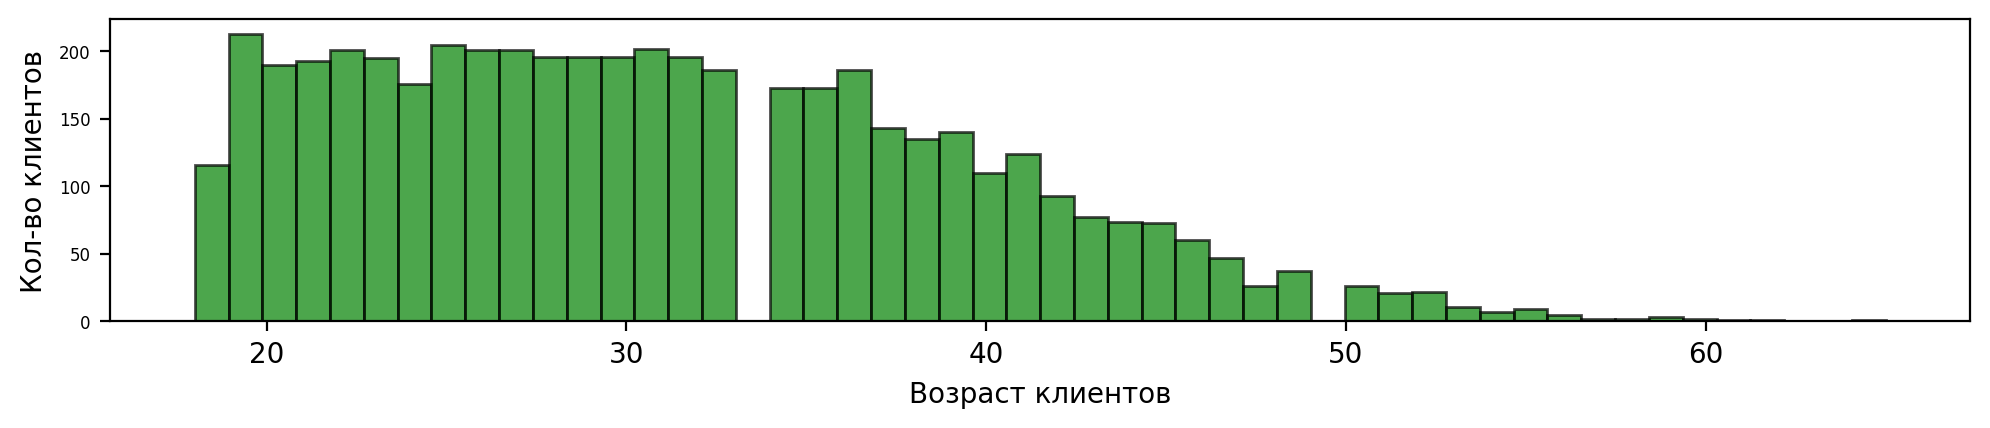

In [7]:
info_plotting(df['Возраст'], 'Возраст клиентов')

С данными по возрасту клиентов всё в порядке, аномальных выбросов не наблюдается. Переходим к распределению заработной платы.

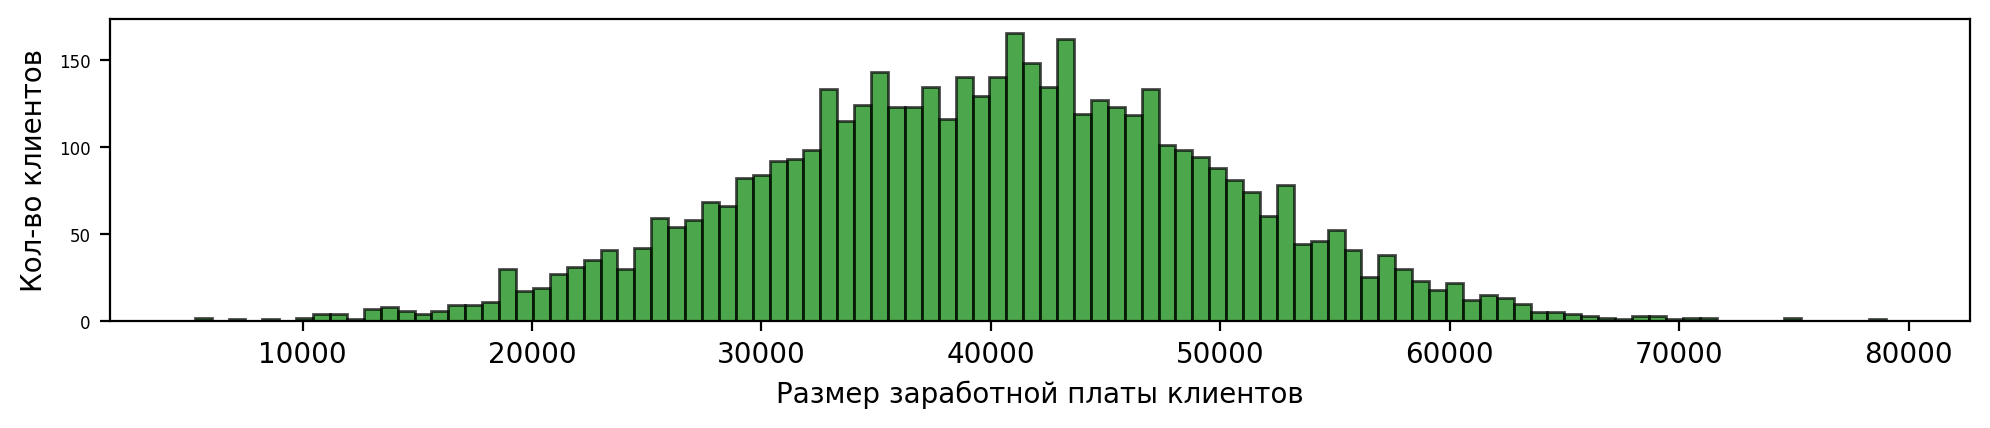

In [8]:
info_plotting(df['Зарплата'], 'Размер заработной платы клиентов')

Аналогичная ситуация как с возрастом, выбросы отсутствуют. Переходим к просмотру уникальных значений по полу, членам семьи и страховым выплатам.

In [9]:
col_names = ['Пол', 'Члены семьи', 'Страховые выплаты']
for i in range(0, 3):
    display(df[col_names[i]].value_counts())

0    2431
1    2416
Name: Пол, dtype: int64

1    1748
0    1461
2    1038
3     437
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

0    4284
1     423
2     114
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

Выбросы также отсутствуют, соответственно можем привести данные к нужным нам типам.

In [10]:
display(df.head(5))
df['Пол'] = np.uint8(df['Пол'])
df['Возраст'] = np.uint8(df['Возраст'])
df['Зарплата'] = np.uint32(df['Зарплата'])
df['Члены семьи'] = np.uint8(df['Члены семьи'])
df['Страховые выплаты'] = np.uint8(df['Страховые выплаты'])

df = df.rename(columns={'Пол' : 'sex', 'Возраст' : 'age', 'Зарплата' : 'income', 
                        'Члены семьи' : 'family_members', 'Страховые выплаты' : 'insurance_payout'})

df.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
sex                 4847 non-null uint8
age                 4847 non-null uint8
income              4847 non-null uint32
family_members      4847 non-null uint8
insurance_payout    4847 non-null uint8
dtypes: uint32(1), uint8(4)
memory usage: 75.7 KB


# 2. Проверка изменения качества линейной регрессии при умножении признаков на обратимую матрицу

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Предсказания:**

$$
a = Xw
$$

**Задача обучения:**

$$
w = \arg\min_w MSE(Xw, y)
$$

**Формула обучения:**

$$
w = (X^T*X)^{-1}*X^T*y
$$

**Будем считать что качество линейной регрессии при умножении матрицы признаков на обратимую матрицу не изменится.**

**Обоснование:** 

Допустим что: $K = X * P$, где $P$ - обратимая матрица. Тогда заменим $X$ на $К$ в формуле предсказаний, предварительно заменив $X$ на $K$ в формуле обучения:
<br>
$a = XP *((XP)^T*XP)^{-1}*(XP)^Ty $

Так как существует следующее свойство матриц: $(AB)^{-1} = B^{-1}A^{-1}$

то мы можем применить его в нашем уравнении:
<br>
$ a = XP*(XP)^{-1}*((XP)^T)^{-1}*(XP)^T*y $
<br>
<br>

Также применим следующее свойство матриц:$ (AB)^T=B^TA^T $
<br>
$a = XP*P^{-1}*X^{-1}*(X^T)^{-1}*(P^T)^{-1}*P^TX^T*y$
<br>

Так же избавимся от единичных матриц которые получаются с помощью следующих свойств:
<br>
$A*A^{-1} = E$
<br>
$A * E = A$
<br>

<br>
$a = X*E*X^{-1}*(X^T)^{-1}*E*X^Ty$
<br>
$a = X*X^{-1}(X^T)^{-1}X^T*y$
<br>

И применим уже использовавшееся ранее свойство: $B^{-1}A^{-1} = (AB)^{-1}$

<br>
$a = X * (X^T*X)^{-1}*X^T*y$
<br>

Соответственно, видим что при умножении матрицы признаков($X$) на обратимую матрицу($P$) **качество линейной регрессии не изменится.**

# 3. Алгоритм преобразования

**Алгоритм**

1. Преобразуем таблицу с признаками ($X$) в матрицу.
2. Создадим случайную обратимую матрицу ($P$).
3. Умножим таблицу с признаками ($X$) на случайную обратимую матрицу($P$)
4. Обучим модель и предскажем результаты на исходных данных, сохраним их в отдельные переменные
5. Обучим модель и предскажем результаты на преобразованных данных, сравним результаты по r2_score между исходными и преобразованными данными.
6. Обратно преобразуем преобразованные данные, обучим модель и предскажем результаты, также сравним результаты по r2_score межуд исходными и преобразованными данными.

# 4. Проверка алгоритма

## 4.1. Подготовка для преобразования данных.

Для начала напишем две функции:
1. Первая функция будет преобразовывать исходные признаки в матрицу, создаст случайную матрицу такой же размерности как матрица с исходными признаками, умножит матрицу исходных признаков на случайную матрицу и на выходе вернет преобразованную матрицу с признаками и случайную матрицу (для обратного преобразования)
2. Вторая функция будет производить восстановление данных, используя преобразованную и случайную матрицы. На выходе вернет исходную таблицу с признаками.

In [11]:
def x_transformation(x):
    x_matrix = x.values
    random_matrix = np.random.randint(random.randint(1, 100), random.randint(101, 1000), (x_matrix.shape[1], x_matrix.shape[1]))
    x_matrix = x_matrix @ random_matrix
    return x_matrix, random_matrix

def reverse_x_transformation(x_matrix, random_matrix):
    return x_matrix.dot(np.linalg.inv(random_matrix))   

Функции подготовлены, теперь предскажем результаты на исходных данных и сохраним их.

## 4.2. Проверка модели на исходных данных.

In [12]:
random_state = 12345
x = df.drop(['insurance_payout'], axis = 1)
y = df['insurance_payout']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = random_state)

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = random_state)
model = LinearRegression()
model.fit(x_train, y_train)

model_train_predictions = model.predict(x_train)
model_valid_predictions = model.predict(x_valid)
sk_r2_train_score = r2_score(y_train, model_train_predictions)
sk_r2_valid_score = r2_score(y_valid, model_valid_predictions)
print(sk_r2_train_score)
print(sk_r2_valid_score)

0.43215820265809746
0.4230772761583642


Теперь, используя созданные нами функции, проведем одновременное сравнение результатов на преобразованных данных и обратнопреобразованных данных.

## 4.3. Проверка модели на преобразованных и обратнопреобразованных данных, сравнение результатов.

In [14]:
results_list = []
name_list = ['преобразованных', 'обратнопреобразованных']
for i in range(0, 2):
    if i == 0:
        
        x_transformed, random_matrix = x_transformation(x)
    elif i == 1:
        
        x_transformed = reverse_x_transformation(x_transformed, random_matrix) 
    x_train, x_valid, y_train, y_valid = train_test_split(x_transformed, y, test_size = 0.25, random_state = random_state)
    model = LinearRegression()
    model.fit(x_train, y_train)
    results_list.append([model.predict(x_train), model.predict(x_valid)])
    r2_score_train = r2_score(y_train, results_list[i][0])
    r2_score_valid = r2_score(y_valid, results_list[i][1])
    print('\033[1m'+ 'Коэффициенты детерминации на ' + name_list[i] + ' данных:' + '\033[0m')
    print('Обучающая выборка:', r2_score_train)
    print('Валидационная выборка:', r2_score_valid)
    print('')
    print('\033[1m'+ 'Разность в коэффициентах детерминации на ' + name_list[i] + ' данных:' + '\033[0m')
    print('Обучающая выборка:', round(sk_r2_train_score - r2_score_train, 12))
    print('Валидационная выборка:', round(sk_r2_valid_score - r2_score_valid, 12))
    print('')

Коэффициенты детерминации на преобразованных данных:
Обучающая выборка: 0.43215820265806615
Валидационная выборка: 0.42307727615841884

Разность в коэффициентах детерминации на преобразованных данных:
Обучающая выборка: 0.0
Валидационная выборка: -0.0

Коэффициенты детерминации на обратнопреобразованных данных:
Обучающая выборка: 0.4321582026580716
Валидационная выборка: 0.4230772761583016

Разность в коэффициентах детерминации на обратнопреобразованных данных:
Обучающая выборка: 0.0
Валидационная выборка: 0.0



Видим что **разница в коэффициентах детерминации как на преобразованных, так и на обратнопреобразованных данных практически отсутствует или минимальна**, соответственно поставленная перед нами задача в виде защиты персональных данных клиентов выполнена без ущерба качеству моделей машинного обучения.